<a href="https://colab.research.google.com/github/Flying010/DeepFakeAudioiProject/blob/main/CNN_LSTM_DeepFakeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers as L
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

import re
import nltk
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/fake-news/train.csv')
#test_dataset = pd.read_csv('/content/gdrive/My Drive/fake-news/test.csv')
#submit_dataset = pd.read_csv('/content/gdrive/My Drive/fake-news/submit.csv')
#test_dataset['label'] = submit_dataset['label']
#curr = pd.read_csv('/content/gdrive/My Drive/fake-news/CURR.csv')

#frames = [final, test_dataset]
#df = pd.concat(frames)

#new_dataset = pd.concat(news_dataset, test_dataset)

In [ ]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
#Replacing the missing values with empty string
#from sklearn.utils import shuffle
#df = shuffle(df)

In [ ]:
# Merge title and author cols
df = df.fillna('')

df["total"] = df['title'] + " " + df["author"]

df.head()

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [ ]:
#Separating the target and features
X = df.drop(["label"], axis = 1)
y = df["label"]

X.shape, y.shape

((20800, 5), (20800,))

In [ ]:
VOCAB_SIZE = 5000
text = X.copy()
def text_cleaning(length):
    ps = PorterStemmer()
    corpus = []
    for i in range(length):
        m = re.sub("[^a-zA-Z]"," ",text["total"][i])
        m = m.lower()
        m = m.split()
        m = [ps.stem(word) for word in m if not word in stopwords.words('english')]
        clean_text = " ".join(m)
        corpus.append(clean_text)
        
    return corpus

In [ ]:
%%time
clean_text_corpus = text_cleaning(len(text))

CPU times: user 41.1 s, sys: 3.57 s, total: 44.7 s
Wall time: 46.3 s


In [ ]:
clean_text_corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet darrel lucu'

In [ ]:
onehot_text = [one_hot(words, VOCAB_SIZE) for words in clean_text_corpus]
# padding sequences
padded_doc = pad_sequences(onehot_text, padding="pre", maxlen = 25)

In [ ]:
x_train = np.array(padded_doc)
y_train = np.array(y)

In [ ]:
def build_model():
    # model structure
    model = tf.keras.Sequential([
        L.Embedding(VOCAB_SIZE, 40, input_length = 25),
        L.Dropout(0.3),
        L.Conv1D(64, 5, activation='relu'),
        L.LSTM(100),
        L.Dropout(0.3),
        L.Dense(64, activation = "relu"),
        L.Dropout(0.3),
        L.Dense(1, activation = "sigmoid")
    ])
    
    model.compile(optimizer="adam", loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
                 metrics = ["accuracy"]
                 )
    
    return model

In [ ]:
news_classifier = build_model()
news_classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 40)            200000    
                                                                 
 dropout (Dropout)           (None, 25, 40)            0         
                                                                 
 conv1d (Conv1D)             (None, 21, 64)            12864     
                                                                 
 lstm (LSTM)                 (None, 100)               66000     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

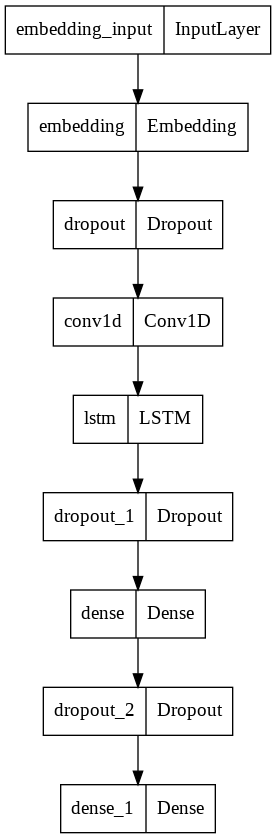

In [ ]:
tf.keras.utils.plot_model(news_classifier)

In [ ]:
my_callbacks = [tf.keras.callbacks.ModelCheckpoint("news_classifier.h5", monitor = "val_loss", save_best_only=True),
                tf.keras.callbacks.CSVLogger("training.log"),
                tf.keras.callbacks.EarlyStopping(patience=5),
                tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
               ]

In [ ]:
history = news_classifier.fit(x_train, y_train, epochs=25, batch_size=150, validation_split = 0.2)

In [ ]:
test_df = pd.read_csv('/content/gdrive/My Drive/fake-news/test.csv')
sample_submission = pd.read_csv('/content/gdrive/My Drive/fake-news/submit.csv')

sample_submission.shape

In [ ]:
test_df = test_df.fillna('')
test_df["total"] = test_df["title"] + " " + test_df["author"]

text_test = test_df.copy()

def text_cleaning_test(length):
    ps = PorterStemmer()
    corpus_test = []
    for i in range(length):
        m = re.sub("[^a-zA-Z]"," ",text_test["total"][i])
        m = m.lower()
        m = m.split()
        m = [ps.stem(word) for word in m if not word in stopwords.words('english')]
        clean_text = " ".join(m)
        corpus_test.append(clean_text)
        
    return corpus_test

clean_test_corpus = text_cleaning_test(len(text_test))

# one hot encoder
onehot_text_test = [one_hot(words, VOCAB_SIZE) for words in clean_test_corpus]

# padding sequences
padded_doc_test = pad_sequences(onehot_text_test, padding="pre", maxlen = 25)

x_test = np.array(padded_doc_test)

In [ ]:
predictions = news_classifier.predict(x_test)
predictions = [int(np.round(pred[0])) for pred in predictions]

In [ ]:
#Data to calculate accuracy test data set
test_ratio = [0]*(1+len(Y_test))
test_id = [0]*(1+len(Y_test))
index = 0
cnt = 0

final_length = 0

for i in range(0,len(test_prediction)):
  #print(ratio[index])
  index += 1

  #print(ratio)
  if(test_prediction[i] == Y_test[i]):
    cnt += 1
  test_ratio[index] = (cnt/(index))
  test_id[index] = index
  if(i % 100 == 0):
    #print(final_length)
    final_length+=1

In [ ]:
#Final data to plot a few points of test data
test_finalratio = [0]*(final_length)
test_finalid = [0]*(final_length)

for i in range(0, final_length):
  test_finalratio[i] = test_ratio[i*100]
  test_finalid[i] = test_id[i*100]

In [ ]:
# Visualize the results:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()